# **Project 1 Report**

Joshua Matni

CS458

## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

In [ ]:
# Codes for P1-1(a)
import numpy as np
import pandas as pd
import scipy as sp # for calculating distances

# generate uniform points
x = np.random.uniform(0, 1, (1000,3)) # range 0-1, dim(1000,3)
df = pd.DataFrame(x)
#df.head()

nDim_arr = sp.spatial.distance.pdist(df, metric="euclidean") # pairwise distances between observations in n-dim space

nDim_arr

min_dist = np.min(nDim_arr)
max_dist = np.max(nDim_arr)
print(f"min: {min_dist}, max: {min_dist}")


min: 0.006786353264913243, max: 0.006786353264913243


**(b) Repeat (a) for different dimensions from 2 to 50.**

min: 0.000791820639560695, max: 1.365666076646493
log ratio: 3.2364658244009306

min: 0.008762195184655406, max: 1.6214934092262656
log ratio: 2.2649490685059988

min: 0.023917272963318987, max: 1.7162166282281741
log ratio: 1.8497655289086903

min: 0.06233029517159303, max: 1.8015105003012533
log ratio: 1.4456454002065677

min: 0.06960057648169786, max: 1.9281390843191697
log ratio: 1.4265587270915427

min: 0.13027503618533995, max: 2.019262125076377
log ratio: 1.1613677870873378

min: 0.1562251128383466, max: 2.1084893693635034
log ratio: 1.0967877559516686

min: 0.2051759430565576, max: 2.2595880852095727
log ratio: 1.000561134937679

min: 0.24121149149253948, max: 2.2661328662555245
log ratio: 0.9240101706820054

min: 0.25768062760080807, max: 2.4079600907843877
log ratio: 0.9214131375226924

min: 0.3383545618789323, max: 2.4633962581013367
log ratio: 0.7979954196695165

min: 0.3060044452866448, max: 2.417099099869944
log ratio: 0.838779970622429

min: 0.4577508051488286, max: 2.56

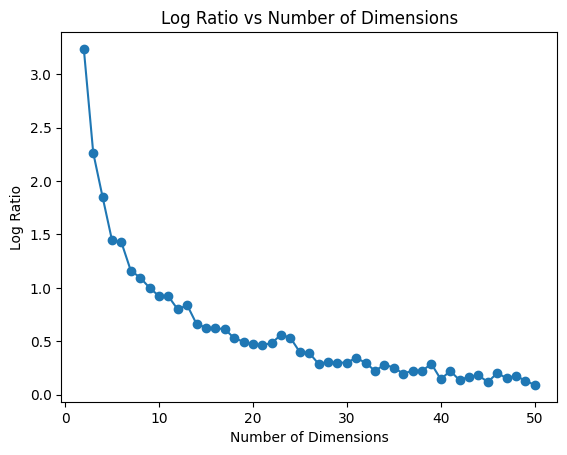

In [ ]:
# Codes for P2-1(b)
import matplotlib.pyplot as plt

dimensions, log_ratios = [], [] # x, y axis

for i in range(2,51):
  n = i # num dims
  x = np.random.uniform(0,1,(1000,n))
  df = pd.DataFrame(x)
  nDim_arr = sp.spatial.distance.pdist(df, metric="euclidean")
  min_dist = np.min(nDim_arr)
  max_dist = np.max(nDim_arr)
  print(f"min: {min_dist}, max: {max_dist}")

  # log_10(max-min)/min
  log_ratio = np.log10((max_dist - min_dist) / min_dist)
  print(f"log ratio: {log_ratio}\n")

  dimensions.append(i)
  log_ratios.append(log_ratio)

# Plot log_10(max-min)/min under different number of dimensions
plt.plot(dimensions, log_ratios, marker='o') # create line plot
plt.xlabel('Number of Dimensions')
plt.ylabel('Log Ratio')
plt.title('Log Ratio vs Number of Dimensions')
plt.show()

Plot log_10(max-min)/min under different number of dimensions.

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

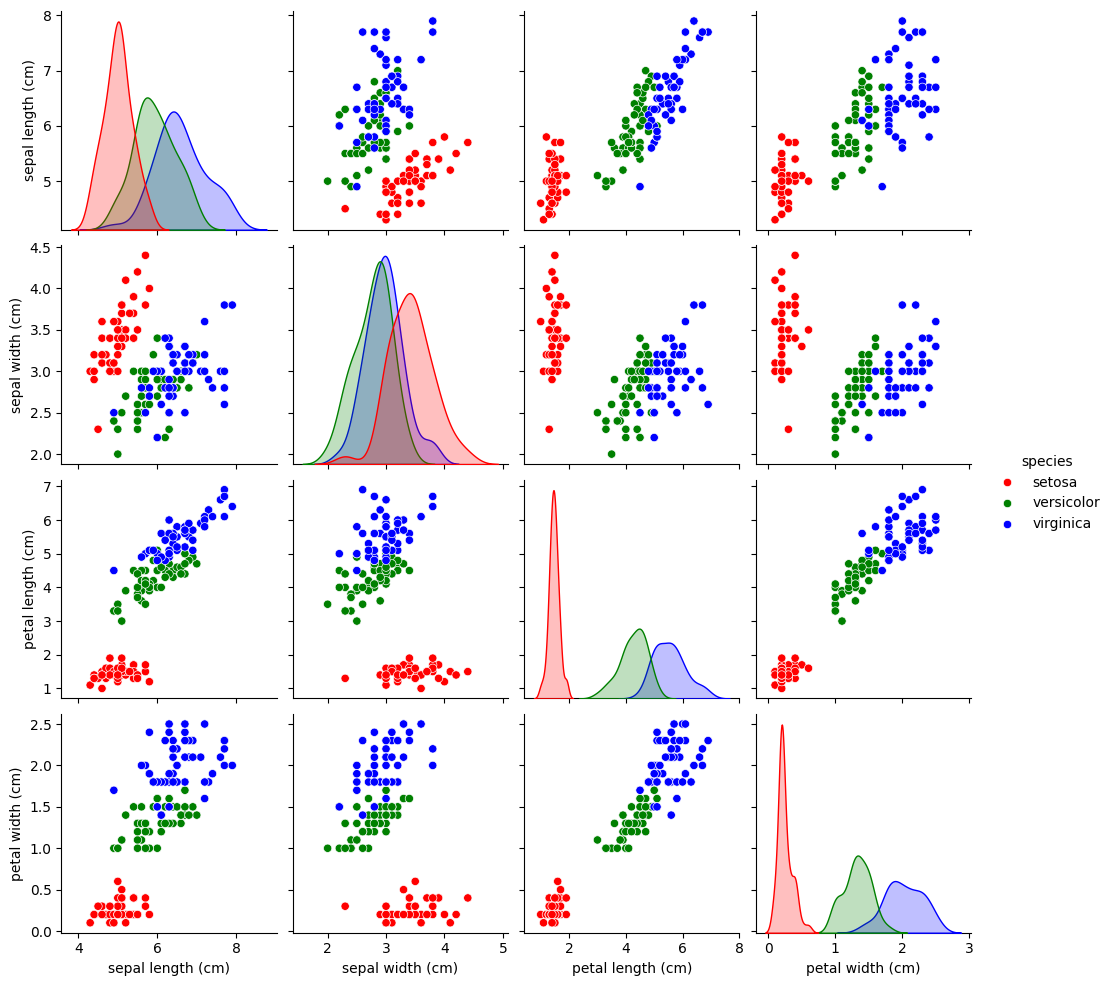

In [ ]:
# Codes for P1-2(a)
from sklearn import datasets
import seaborn as sns

# get dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# map numeric target codes to species names and create a new 'species' column
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# plot
colors = ['red', 'green', 'blue']
sns.pairplot(iris_df, hue="species", palette=colors)
plt.show()


**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

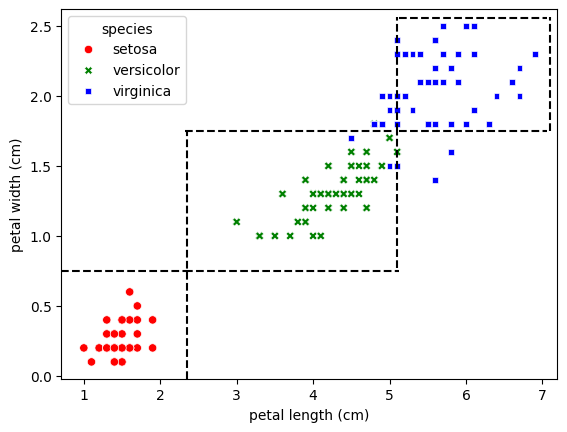

In [ ]:
# Codes for P1-2(b)
iris_df
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species', style='species', palette=colors)

# for setosa descision boundary
plt.axhline(y=0.75, xmax=0.25, color='black', linestyle='--')
plt.axvline(x=2.35, ymax=0.67, color='black', linestyle='--')

# for versicolor
plt.axhline(y=1.75, xmin=0.25, xmax=0.67, color='black', linestyle='--')
plt.axvline(x=5.1, ymin=0.3, ymax=0.67, color='black', linestyle='--')
plt.axhline(y=0.75, xmin=0.25, xmax=0.68, color='black', linestyle='--')

# for virginica
plt.axvline(x=5.1, ymin=0.67, ymax=0.98, color='black', linestyle='--')
plt.axhline(y=2.56, xmin=0.68, xmax=0.98, color='black', linestyle='--')
plt.axvline(x=7.1, ymin=0.67, ymax=0.98, color='black', linestyle='--')
plt.axhline(y=1.75, xmin=0.68, xmax=0.98, color='black', linestyle='--')

plt.show()

In [ ]:
# Distinguishing the Dataset
setosa_correct, setosa_incorrect, versicolor_correct, versicolor_incorrect, virginica_correct, virginica_incorrect = [], [], [], [], [], []

for index, row in iris_df.iterrows():
  petal_length = row['petal length (cm)']
  petal_width = row['petal width (cm)']
  actual_species = row['species']

  if petal_length <= 2.35 and petal_width < 0.75:
      predicted_species = 'setosa'
  elif 2.35 < petal_length <= 5.1 and 0.75 <= petal_width <= 1.75:
      predicted_species = 'versicolor'
  elif petal_length > 5.1 or petal_width > 1.75:
      predicted_species = 'virginica'


  if predicted_species == actual_species:
    if predicted_species == 'setosa':
      setosa_correct.append(index)
    elif predicted_species == 'versicolor':
      versicolor_correct.append(index)
    elif predicted_species == 'virginica':
      virginica_correct.append(index)
  else:
    if predicted_species == 'setosa':
      setosa_incorrect.append(index)
    elif predicted_species == 'versicolor':
      versicolor_incorrect.append(index)
    elif predicted_species == 'virginica':
      virginica_incorrect.append(index)

total_setosa = len(setosa_correct) + len(setosa_incorrect)
total_versicolor = len(versicolor_correct) + len(versicolor_incorrect)
total_virginica = len(virginica_correct) + len(virginica_incorrect)

df = pd.DataFrame({'Species': ['setosa', 'verisicolor', 'virginica'],
                   'Correct': [len(setosa_correct), len(versicolor_correct), len(virginica_correct)],
                   'Incorrect': [len(setosa_incorrect), len(versicolor_incorrect), len(virginica_incorrect)],
                   'Total': [total_setosa, total_versicolor, total_virginica]}
                  )

df.set_index('Species', inplace=True)
df

,Correct,Incorrect,Total
Species,,,
setosa,50,0,50
verisicolor,49,3,52
virginica,47,1,48


Discuss your results here.

The accuracy of the classification results is quite high. Only four samples were misclassified out of 150. The decision boundaries defined using Petal Length and Petal Width were good enough to perfectly separate the Setosa species. In fact, it achieved 100%. Versicolor and Virginica showed a little overlap in the classes and hence a few misclassifications. Three samples of Versicolor get misclassified. This must be because its feature values are close to that of Virginica. Virginica had only 1 misclassified sample, indicating the boundaries were well-defined for this class. Generally, boundaries performed well with a total classification accuracy of 97.3%. Although these results are good, the boundaries between Versicolor and Virginica could be fine-tuned or other features such as Sepal Length included in order to enhance the classification performance.

# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

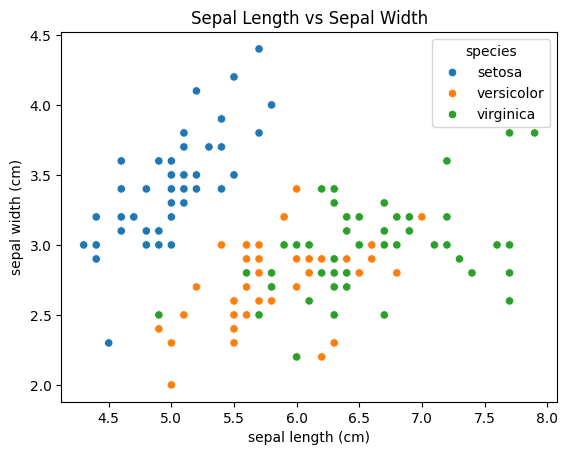

In [ ]:
# Codes for P1-3(a)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

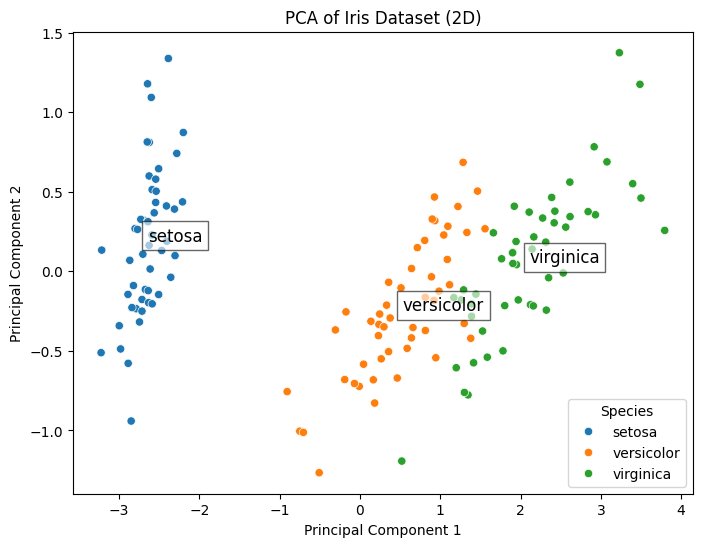

In [ ]:
# Codes for P1-3(b)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = iris.data  # feature data
y = iris.target  # target labels

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# PCA to reduce dimensionality from 4 to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# new DF for PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris_df['species']

# plot PCA-transformed data
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', ax=ax)

# annotate the centroids of each species in PCA plot
for name, label in [('setosa', 0), ('versicolor', 1), ('virginica', 2)]:
    ax.text(X_pca[y == label, 0].mean(),
            X_pca[y == label, 1].mean(),
            name,
            fontsize=12,
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

ax.set_title('PCA of Iris Dataset (2D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

Discuss your results here.

The PCA plot displays clear separation between the three Iris species based on the first two principal components. In contrast to the original plot using Sepal Length and Sepal Width, this PCA plot shows improved separability between Versicolor and Virginica, which overlapped considerably in the earlier visualization. This is because, in PCA, it combines all four features, Sepal Length, Sepal Width, Petal Length, and Petal Width, to capture the maximum variance, hence giving well-marked clusters: Setosa is in complete isolation while Versicolor and Virginica are closer but with a clear boundary. In general, PCA does a better job of showing the Iris data set in two dimensions so that all three species can be easily distinguished from one another.

